In [31]:
https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

SyntaxError: invalid syntax (<ipython-input-31-4ab0d4cb9f98>, line 1)

In [70]:
import numpy as np
import mlai
import os

In [100]:
def create_data(per_cluster=30):
    """Create a randomly sampled data set
    
    :param per_cluster: number of points in each cluster
    """
    X = []
    y = []
    scale = 3
    prec = 1/(scale*scale)
    pos_mean = [[-1, 0],[0,0.5],[1,0]]
    pos_cov = [[prec, 0.], [0., prec]]
    neg_mean = [[0, -0.5],[0,-0.5],[0,-0.5]]
    neg_cov = [[prec, 0.], [0., prec]]
    for mean in pos_mean:
        X.append(np.random.multivariate_normal(mean=mean, cov=pos_cov, size=per_class))
        y.append(np.ones((per_class, 1)))
    for mean in neg_mean:
        X.append(np.random.multivariate_normal(mean=mean, cov=neg_cov, size=per_class))
        y.append(np.zeros((per_class, 1)))
    return np.vstack(X), np.vstack(y).flatten()

In [101]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

In [102]:
import numpy as np

from sklearn import svm, datasets
%matplotlib inline

In [103]:
def make_meshgrid(xlim, ylim, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = xlim.min() - 1, xlim.max() + 1
    y_min, y_max = ylim.min() - 1, ylim.max() + 1
    return xx, yy

In [104]:
def plot_contours(ax, cl, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = cl.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [105]:

def decision_boundary_plot(models, X, y, axs, filename, titles, xlim, ylim):
    """Plot a decision boundary on the given axes
    
    :param axs: the axes to plot on.
    :param models: the SVM models to plot
    :param titles: the titles for each axis
    :param X: input training data
    :param y: target training data"""
    for ax in axs.flatten():
        ax.clear()
    X0, X1 = X[:, 0], X[:, 1]
    if xlim is None:
        xlim = [X0.min()-1, X0.max()+1]
    if ylim is None:
        ylim = [X1.min()-1, X1.max()+1]
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.02),
                         np.arange(ylim[0], ylim[1], 0.02))
    for cl, title, ax in zip(models, titles, axs.flatten()):
        plot_contours(ax, cl, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.plot(X0[y==1], X1[y==1], 'k.', markersize=10)
        ax.plot(X0[y==0], X1[y==0], 'w.', markersize=10)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        mlai.write_figure(os.path.join(filename),
                          figure=fig,
                          transparent=True)
    return xlim, ylim



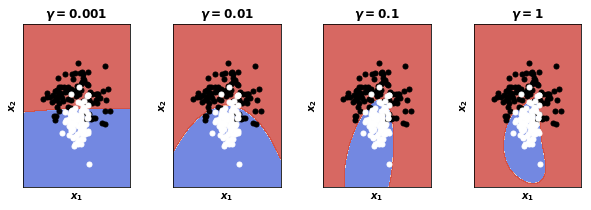

In [106]:
# Create an instance of SVM and fit the data. 
C = 100.0  # SVM regularization parameter
gammas = [0.001, 0.01, 0.1, 1]


per_class=30
num_samps = 20
# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(1, 4, figsize=(10,3))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
xlim=None
ylim=None
for samp in range(num_samps):
    X, y=create_data(per_class)
    models = []
    titles = []
    for gamma in gammas:
        models.append(svm.SVC(kernel='rbf', gamma=gamma, C=C))
        titles.append('$\gamma={}$'.format(gamma))
    models = (cl.fit(X, y) for cl in models)
    xlim, ylim = decision_boundary_plot(models, X, y, 
                           axs=ax, 
                           filename='../../slides/diagrams/ml/bias-variance{samp:0>3}.svg'.format(samp=samp), 
                           titles=titles,
                          xlim=xlim,
                          ylim=ylim)

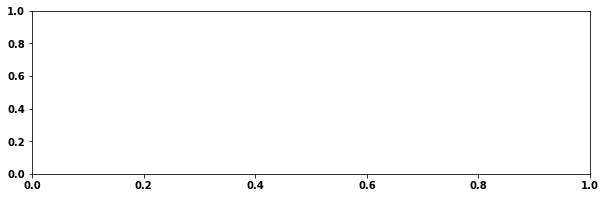

In [81]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(np.random.randn(3,1), np.random.randn(3,1))
ax.clear()